In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14,8)

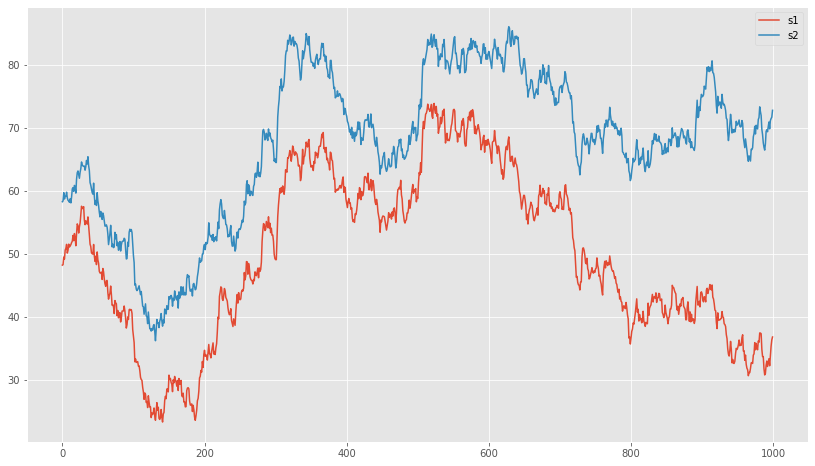

In [26]:
np.random.seed(100)
drift = 100
r0 = pd.Series(np.random.normal(0, 1, 1000))
s0 = pd.Series(np.cumsum(r0), name='s0') + drift

noise1 = np.random.normal(0, .4, 1000)
drift1 = 50
r1 = r0 + noise1
s1 = pd.Series(np.cumsum(r1), name='s1') + drift1

noise2 = np.random.normal(0, .4, 1000)
drift2 = 60
r2 = r0 + noise2
s2 = pd.Series(np.cumsum(r2), name='s2') + drift2

pd.concat([s1, s2], axis=1).plot()
plt.show()

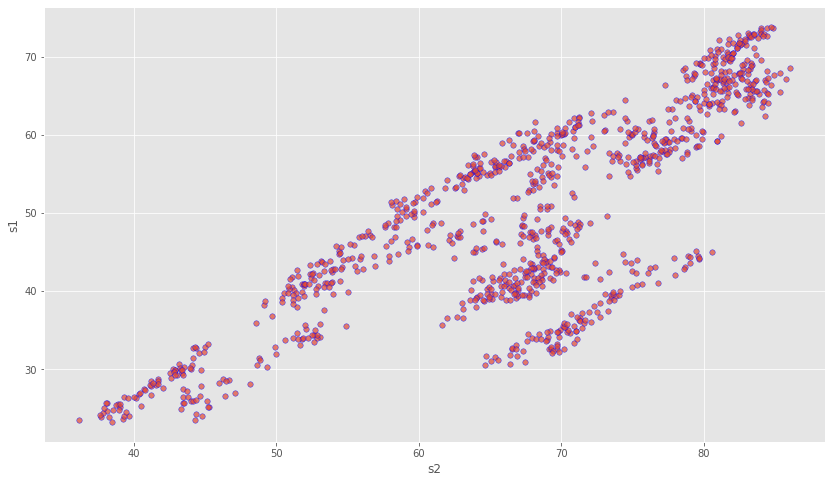

In [27]:
sc = plt.scatter(s2, s1, s=30, edgecolor='b', alpha = .7)
plt.xlabel('s2')
plt.ylabel('s1');

Regression slope and intercept

In [28]:
from sklearn.linear_model import LinearRegression

def regression_slope_and_intercept(xSeries, ySeries):
    lr = LinearRegression()
    xVar = xSeries.values.reshape(-1,1)
    yVar = ySeries.values.reshape(-1,1)
    
    lr.fit(xVar, yVar)
    
    slope = lr.coef_[0][0]
    intercept = lr.intercept_[0]
    return (slope, intercept)

In [29]:
slope, intercept = regression_slope_and_intercept(s1, s2)
print(f"Slope: {slope:.2f}, Intercept: {intercept:.2f}")

Slope: 0.74, Intercept: 30.62


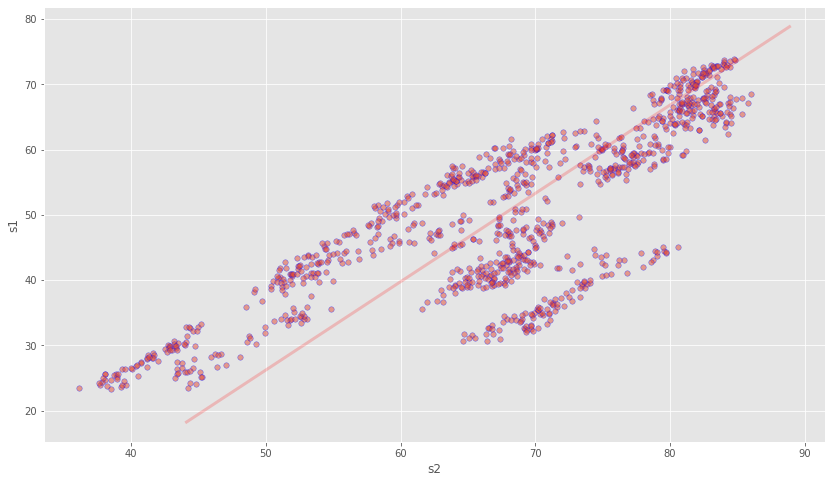

In [30]:
plt.scatter(s2, s1, s=30, edgecolor='b', alpha=.5)
x = np.linspace(s1.min()-5, s1.max()+5, 2)
yPred = slope*x+intercept
plt.plot(yPred, x, alpha=.2, lw=3, color='r')
plt.xlabel('s2')
plt.ylabel('s1');